## 赛题
### 一、赛题数据

赛题以新闻数据为赛题数据，数据集报名后可见并可下载。赛题数据为新闻文本，并按照字符级别进行匿名处理。整合划分出14个候选分类类别：财经、彩票、房产、股票、家居、教育、科技、社会、时尚、时政、体育、星座、游戏、娱乐的文本数据。

赛题数据由以下几个部分构成：训练集20w条样本，测试集A包括5w条样本，测试集B包括5w条样本。为了预防选手人工标注测试集的情况，我们将比赛数据的文本按照字符级别进行了匿名处理。处理后的赛题训练数据如下：


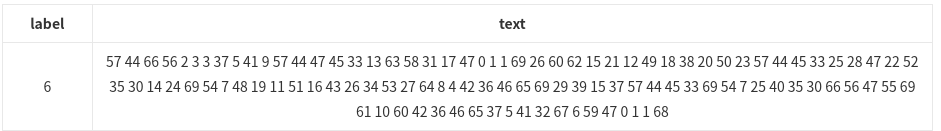
在数据集中标签的对应的关系如下：

```
{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
```

赛题数据来源为互联网上的新闻，通过收集并匿名处理得到。因此选手可以自行进行数据分析，可以充分发挥自己的特长来完成各种特征工程，不限制使用任何外部数据和模型。

数据列使用\t进行分割，Pandas读取数据的代码如下：
```
train_df = pd.read_csv('../input/train_set.csv', sep='\t')
```

### 二、评测标准
评价标准为类别f1_score的均值，选手提交结果与实际测试集的类别进行对比，结果越大越好
$$
计算公式： F1 = 2*\frac{(precision*recall)}{precision+recall}
$$
```
from sklearn.metrics import f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
f1_score(y_true, y_pred, average='macro')
```

# 解题
典型的字符识别问题

## 1.赛题理解

### 1.1 数据读取
使用Pandas库完成数据读取操作，并对赛题数据进行分析。
###  1.2 解题思路
赛题思路分析：赛题本质是一个文本分类问题，需要根据每句的字符进行分类。但赛题给出的数据是匿名化的，不能直接使用中文分词等操作，这个是赛题的难点： **对匿名字符进行建模，进而完成文本分类**

由于文本数据是一种典型的非结构化数据，因此可能涉及到**特征提取**和**分类模型**两个部分。

- 思路1：TF-IDF + 机器学习分类器

直接使用TF-IDF对文本提取特征，并使用分类器进行分类。在分类器的选择上，可以使用SVM、LR、或者XGBoost。

- 思路2：FastText

FastText是入门款的词向量，利用Facebook提供的FastText工具，可以快速构建出分类器。

- 思路3：WordVec + 深度学习分类器

WordVec是进阶款的词向量，并通过构建深度学习分类完成分类。深度学习分类的网络结构可以选择TextCNN、TextRNN或者BiLSTM。

- 思路4：Bert词向量

Bert是高配款的词向量，具有强大的建模学习能力。




## 2. 数据读取与数据分析
- 学习使用Pandas读取赛题数据
- 分析赛题数据的分布规律

### 2.1 数据读取

In [3]:
import pandas as pd
train_df = pd.read_csv('./data/train_set.csv', sep='\t', nrows=100) # 数据集比较大，读取行数先设置为100
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


### 2.2 数据分析
虽然对于非结构数据并不需要做很多的数据分析，但通过数据分析还是可以找出一些规律。

通过数据分析希望得出以下结论：

- 赛题数据中，新闻文本的长度是多少？
- 赛题数据的类别分布是怎么样的，哪些类别比较多？
- 赛题数据中，字符分布是怎么样的？

#### （1）句子长度分析
直接统计单词的个数来得到每个句子的长度。 统计如下：

In [6]:
%pylab inline
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count     100.000000
mean      872.320000
std       923.138191
min        64.000000
25%       359.500000
50%       598.000000
75%      1058.000000
max      7125.000000
Name: text_len, dtype: float64


- DataFrame.count:Count number of non-NA/null observations.
- DataFrame.max: Maximum of the values in the object.
- DataFrame.min: Minimum of the values in the object.
- DataFrame.mean: Mean of the values.
- DataFrame.std:Standard deviation of the observations.

Text(0.5, 1.0, 'Histogram of char count')

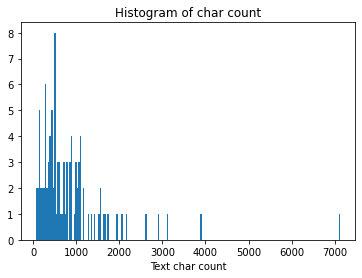

In [9]:
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title('Histogram of char count')

绘制了直方图，可见大部分句子的长度都几种在2000以内

#### (2) 新闻类别分布

Text(0.5, 0, 'category')

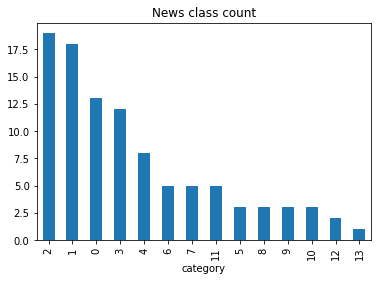

In [10]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel('category')

在数据集中标签的对应的关系如下：
```
{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
```

#### (3) 字符分布统计
统计每个字符出现的次数:将训练集中所有的句子进行拼接进而划分为字符

In [27]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(' '))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse=True)

print('number of the chars:', len(train_df['text']), '; Number of the categories of chars:', len(word_count))
print('highest frequency word:', word_count[0])
print('lowest frequency word:', word_count[-1])

number of the chars: 100 ; Number of the categories of chars: 2405
highest frequency word: ('3750', 3702)
lowest frequency word: ('5034', 1)


这里还可以根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号

In [43]:
from collections import Counter
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(' '))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print('length of the first row of Column `text`: ', len(train_df['text_unique'][0]))
print('length of the first row of Column `text_unique`: ', len(train_df['text'][0]))
print('Number of the unique texts:', len(all_lines), '\nNumber of the\
 categories of the unique texts:', len(word_count))
print('The unique text with the highest frequency : ', word_count[0])
print('The unique text with the second highest frequency : ', word_count[1])
print('The unique text with the third highest frequency : ', word_count[2])

length of the first row of Column `text`:  1986
length of the first row of Column `text_unique`:  5120
Number of the unique texts: 129327 
Number of the categories of the unique texts: 2405
The unique text with the highest frequency :  ('900', 99)
The unique text with the second highest frequency :  ('3750', 99)
The unique text with the third highest frequency :  ('648', 96)


### 3.数据分析的结论
通过上述分析我们可以得出以下结论：

- 赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
- 赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
- 赛题总共包括7000-8000个字符；

通过数据分析，我们还可以得出以下结论：
- 每个新闻平均字符个数较多，可能需要截断；
- **由于类别不均衡，会严重影响模型的精度**